In [35]:
# prepares the notebook for "inline" graphing, and imports matplotlib library
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import matplotlib.cbook as cbook
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from os import listdir
from os.path import isfile, join

In [36]:
mypath = r"C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData"

voltageToAnalyse = 0.4

class DataAtVoltage:
    def __init__(self, filePath):
        self.filePath = filePath
        self.getSize()
        # self.getCurrents()
        # self.getResistances()
        self.getData()
    
    def getSize(self):
        size = self.filePath.split("NbO2_")[1].split("_Dev")[0][:-2]
        size = size + r"x" + size + r" nm$^2$"
        self.size = size
        
    def getData(self):      
        df5 = pd.read_csv(self.filePath, names=['Time (s)','Current (A)','Voltage (V)', 'Temperature (K)'], sep='\t',skiprows=1)
        data = df5.values
        df5.head()
        # allData = data[:,0][54:]
        # I= [ele.split(",")[2] for ele in allData]
        # V= [ele.split(",")[1] for ele in allData]
        
        self.t = data[:,0]
        self.I = data[:,1]
        self.V = data[:,2]
        self.temps = data[:,3]

        self.R = self.V / self.I
        self.R = np.abs(self.R)

        

In [37]:
allFiles = []
for fileName in listdir(mypath):
    fullPath = join(mypath, fileName)
    print(fullPath)
    if isfile(fullPath):
        allFiles.append(DataAtVoltage(fullPath))

# allFiles[0] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220609_12-28-00-453073_NbO2_50nm_DevX2Y1_DieX0Y0_1.csv")
print(allFiles[0].R)

C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053023_D13.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053023_D14.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053023_D15.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053023_D16.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053123_D10.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053123_D11.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053123_D12.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053123_D7.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053123_D8.txt
C:\Users\Ted Mburu\Documents\GitHub\Nb02_v2\old\newData\IVs_NbO2_Ti10_KBSky1574_Sam23_053123_

In [38]:
sizes = []
for file in allFiles:
    if sizes.count(file.size) == 0:
        sizes.append(file.size)

print(sizes)

['Ti10_KBSky1574_Sam23_053023_D13.txTi10_KBSky1574_Sam23_053023_D13.t nm$^2$', 'Ti10_KBSky1574_Sam23_053023_D14.txTi10_KBSky1574_Sam23_053023_D14.t nm$^2$', 'Ti10_KBSky1574_Sam23_053023_D15.txTi10_KBSky1574_Sam23_053023_D15.t nm$^2$', 'Ti10_KBSky1574_Sam23_053023_D16.txTi10_KBSky1574_Sam23_053023_D16.t nm$^2$', 'Ti10_KBSky1574_Sam23_053123_D10.txTi10_KBSky1574_Sam23_053123_D10.t nm$^2$', 'Ti10_KBSky1574_Sam23_053123_D11.txTi10_KBSky1574_Sam23_053123_D11.t nm$^2$', 'Ti10_KBSky1574_Sam23_053123_D12.txTi10_KBSky1574_Sam23_053123_D12.t nm$^2$', 'Ti10_KBSky1574_Sam23_053123_D7.txTi10_KBSky1574_Sam23_053123_D7.t nm$^2$', 'Ti10_KBSky1574_Sam23_053123_D8.txTi10_KBSky1574_Sam23_053123_D8.t nm$^2$', 'Ti10_KBSky1574_Sam23_053123_D9.txTi10_KBSky1574_Sam23_053123_D9.t nm$^2$']


In [39]:
print(len(allFiles))

resistances = []
for size in sizes:
    resistancesPerSize = []
    for file in allFiles:
        if file.size == size: 
            resistancesPerSize.append(abs(file.R[0]))
            resistancesPerSize.append(abs(file.R[1]))
    resistances.append(resistancesPerSize)

10


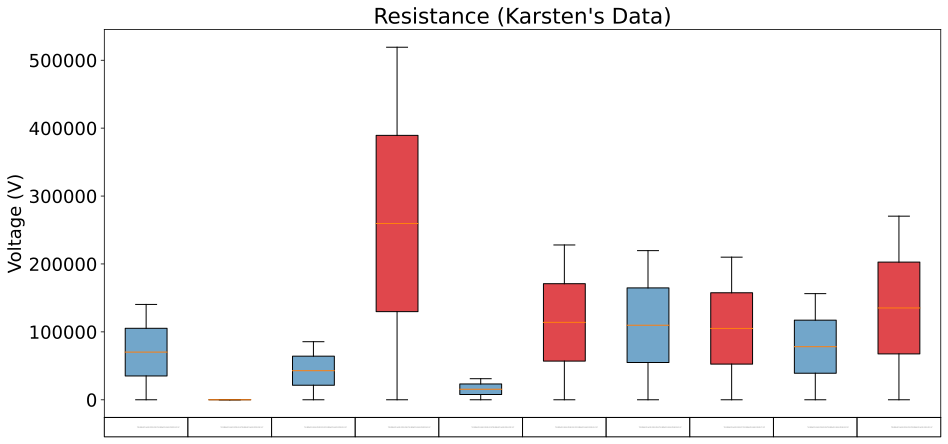

In [40]:
# creates the box and whisker plot
fig, ax = plt.subplots(figsize =(15, 7))
 
# Creating plot
title = "Resistance (Karsten's Data)"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')
font = {'size': 18 }
matplotlib.rc('font', **font)

# finalDataToPlot = np.concatenate((karsensDataToPlot, data), axis=0)
box = plt.boxplot(resistances, patch_artist=True)

red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# create text labels for the table at the bottom

sizesInTable = [np.array(sizes)]
cell_text = sizesInTable
the_table = plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])


cells = the_table.properties()["celld"]
# print(cells)
for i in range(0, 3):
    cells[0, i]._loc = 'center'


plt.xticks([])
# show plot
plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 


# 50 data taken out, everything else shifts
# our data, we use 2x2 4x4 15x15, only use 0% doping
# talk to alex about 15 or 20 data
# resistance graphs, no green boxes, only look at or around 0.4 V


In [41]:
print(np.mean(resistances[4]))

15525.390067662755
